In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
!pip install uproot
import uproot as ur

plt.rcParams["figure.figsize"] = (10, 8)


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
import glob


In [3]:
#exp(-[maximum w0)) * minimum shower energy * sf
np.exp(-8)*10*sf


0.0033546262790251184

skipping event
skipping event


(array([  3.,  10.,  48., 137., 124., 101.,  49.,  19.,   6.,   1.]),
 array([1.        , 1.0050218 , 1.01004361, 1.01506541, 1.02008721,
        1.02510902, 1.03013082, 1.03515262, 1.04017443, 1.04519623,
        1.05021803]),
 <BarContainer object of 10 artists>)

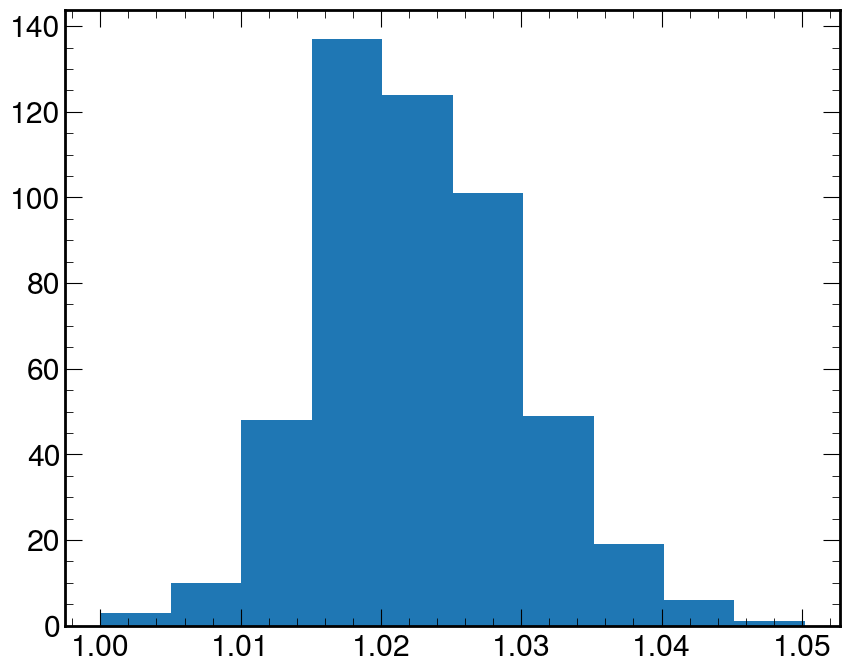

In [27]:

input_file="dd4hep/zdc_staggered_h3_inf_reco_neutron_10GeV_theta_deg.edm4hep.root"
arrays=ur.open(f'{input_file}:events').arrays()
rats=[]
for i in range(len(arrays)):
    E=arrays['ZDCHitsReco.energy'][i]
    if sum(E[E>0.000472/2])==0: 
        print("skipping event")
        continue
    rats.append(sum(E)/sum(E[E>0.000472/10]))
plt.hist(rats)

In [ ]:
input_file="dd4hep/zdc_staggered_h3_inf_reco_neutron_50GeV_theta_deg.edm4hep.root"
arrays=ur.open(f'{input_file}:events').arrays()
times=[]
E=[]
for i in range(len(arrays)):
    t=arrays['ZDCHitsReco.time'][i]
    times+=list(t)
    E+=list(arrays['ZDCHitsReco.energy'][i])
times=np.array(times)
E=np.array(E)

In [38]:
print(len(times[(times<2000+120)&(E>0.000470*0.1)])/len(times[E>0.000470*0.1]))

0.8516893451195073


(array([0.00000e+00, 3.24357e+05, 4.22660e+04, 1.71990e+04, 1.00440e+04,
        7.01200e+03, 5.32800e+03, 4.39000e+03, 3.51900e+03, 3.16600e+03,
        2.75500e+03, 2.45500e+03, 2.30000e+03, 2.03300e+03, 1.83800e+03,
        1.72400e+03, 1.57000e+03, 1.46700e+03, 1.42000e+03, 1.31000e+03,
        1.18900e+03, 1.13800e+03, 1.09800e+03, 1.03400e+03, 1.03700e+03,
        1.02200e+03, 8.88000e+02, 8.70000e+02, 8.64000e+02, 8.63000e+02,
        7.79000e+02, 7.49000e+02, 7.63000e+02, 6.78000e+02, 7.18000e+02,
        7.10000e+02, 6.88000e+02, 6.71000e+02, 6.25000e+02, 6.05000e+02,
        5.73000e+02, 5.78000e+02, 5.75000e+02, 5.38000e+02, 5.60000e+02,
        5.49000e+02, 5.11000e+02, 5.21000e+02, 4.73000e+02, 4.80000e+02,
        4.97000e+02, 4.62000e+02, 4.83000e+02, 4.43000e+02, 4.35000e+02,
        3.88000e+02, 4.31000e+02, 4.57000e+02, 4.08000e+02, 3.98000e+02,
        3.70000e+02, 4.13000e+02, 4.00000e+02, 3.26000e+02, 3.68000e+02,
        3.68000e+02, 3.50000e+02, 2.90000e+02, 3.11

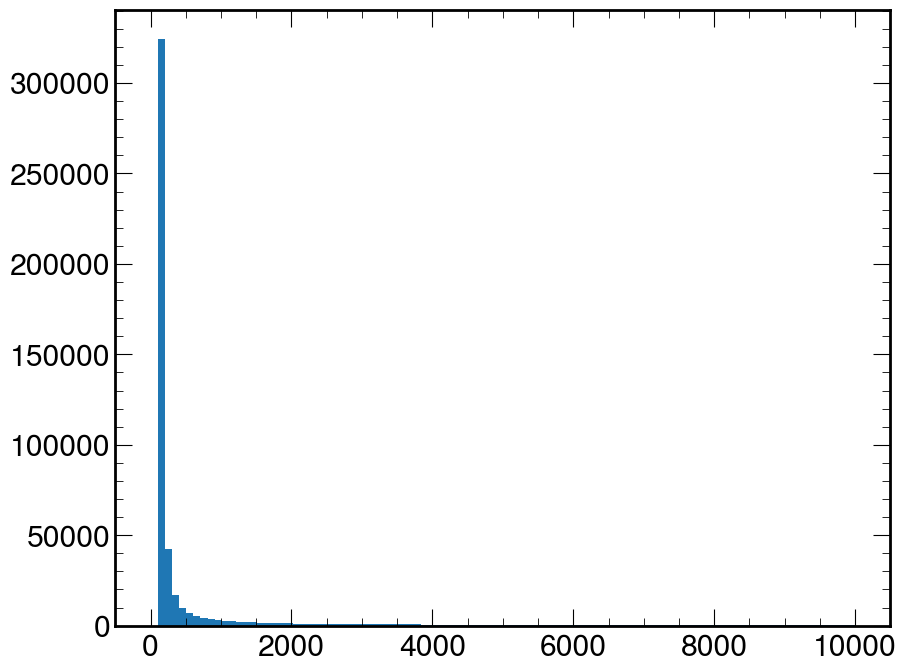

In [37]:
plt.hist(times[E>0.000470*0.1], bins=np.linspace(0, 10000,100))